<a href="https://colab.research.google.com/github/carlomigs/tensortrade/blob/master/examples/migs_TensorTrade_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import warnings
import numpy

def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.simplefilter(action='ignore', category=FutureWarning)
numpy.seterr(divide = 'ignore') 

sys.path.append(os.path.dirname(os.path.abspath('')))

In [0]:
!git clone https://github.com/Kismuz/btgym.git

Cloning into 'btgym'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 7001 (delta 4), reused 8 (delta 2), pack-reused 6977
Receiving objects: 100% (7001/7001), 126.71 MiB | 25.44 MiB/s, done.
Resolving deltas: 100% (5172/5172), done.
Checking out files: 100% (348/348), done.


In [0]:
!git clone https://github.com/notadamking/tensortrade.git

Cloning into 'tensortrade'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 2892 (delta 2), reused 2 (delta 0), pack-reused 2881
Receiving objects: 100% (2892/2892), 29.82 MiB | 28.07 MiB/s, done.
Resolving deltas: 100% (1696/1696), done.


In [0]:
!pip install -e /content/tensortrade

Obtaining file:///content/tensortrade
     |████████████████████████████████| 17.3MB 477kB/s 
     |████████████████████████████████| 10.5MB 34.4MB/s 
     |████████████████████████████████| 1.6MB 23.3MB/s 
  Created wheel for gym: filename=gym-0.14.0-cp36-none-any.whl size=1637526 sha256=33242b06e622110bdc281d6e0729d0e03c52b5e7d4699e254c2be69e443b324d
  Stored in directory: /root/.cache/pip/wheels/7e/53/f6/c0cd3c9bf953f35c0aee7fa62ea209371e92f5e5cced3245ba
Successfully built gym
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.3
    Uninstalling numpy-1.17.3:
      Successfully uninstalled numpy-1.17.3
  Found existing installation: pandas 0.25.2
    Uninstalling pandas-0.25.2:
      Successfully uninstalled pandas-0.25.2
  Found existing installation: gym 0.15.3
    

In [0]:
%cd /content/tensortrade
%ls

/content/tensortrade
/content/tensortrade
CODE_OF_CONDUCT.md  examples/    README.md         tensortrade/
CONTRIBUTING.md     LICENSE      requirements.txt  tensortrade.egg-info/
Dockerfile          Makefile     setup.cfg         tests/
docs/               MANIFEST.in  setup.py


In [0]:
!pip install -e .[tf,tensorforce,baselines,ccxt,fbm] -U

Obtaining file:///content/tensortrade
     |████████████████████████████████| 225kB 3.4MB/s 
     |████████████████████████████████| 1.4MB 35.5MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 317kB 37.7MB/s 
     |████████████████████████████████| 92.5MB 105kB/s 
     |████████████████████████████████| 2.3MB 27.9MB/s 
     |████████████████████████████████| 256kB 42.0MB/s 
     |████████████████████████████████| 1.2MB 31.2MB/s 
     |████████████████████████████████| 3.2MB 35.7MB/s 
     |████████████████████████████████| 368kB 23.7MB/s 
     |████████████████████████████████| 204kB 40.0MB/s 
     |████████████████████████████████| 317kB 46.7MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=e770edacedc40e154db7a87476cba27d9295c138c0603abf48b51ae5a0ce7f66
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
  Fo

In [0]:
!pip install talib-binary

     |████████████████████████████████| 2.4MB 3.4MB/s 


In [0]:
%ls /content/btgym/examples/data/

/content/tensortrade
DAT_ASCII_EURCHF_M1_2017.csv*
DAT_ASCII_EURGBP_M1_2017.csv*
DAT_ASCII_EURJPY_M1_2017.csv*
DAT_ASCII_EURUSD_M1_2010.csv*
DAT_ASCII_EURUSD_M1_2011.csv*
DAT_ASCII_EURUSD_M1_2012.csv*
DAT_ASCII_EURUSD_M1_2013.csv*
DAT_ASCII_EURUSD_M1_2014.csv*
DAT_ASCII_EURUSD_M1_2015.csv*
DAT_ASCII_EURUSD_M1_2016.csv
DAT_ASCII_EURUSD_M1_201701.csv*
DAT_ASCII_EURUSD_M1_201702.csv*
DAT_ASCII_EURUSD_M1_201703_1_10.csv
DAT_ASCII_EURUSD_M1_201703.csv*
DAT_ASCII_EURUSD_M1_201704.csv*
DAT_ASCII_EURUSD_M1_201705.csv*
DAT_ASCII_EURUSD_M1_201706.csv*
DAT_ASCII_EURUSD_M1_2017.csv*
test_bent_sine_1min_period1500_300_delta0002.csv
test_bent_sine_1min_period_300_1500_delta0002.csv
test_sine_1min_period256_delta0002.csv


In [0]:
import numpy
import pandas as pd
from tensortrade.exchanges.simulated import SimulatedExchange

headers=['datetime', 'open', 'high', 'low', 'close', 'volume']
df = pd.read_csv('/content/btgym/examples/data/DAT_ASCII_EURUSD_M1_2017.csv',
                 delimiter=';',
                 names=headers)

exchange = SimulatedExchange(data_frame=df, base_instrument='USD', should_pretransform_obs=True)
exchange.data_frame.tail()

,open,high,low,close,volume
371630,1.19972,1.19987,1.19972,1.19987,0
371631,1.19985,1.19985,1.19970,1.19970,0
371632,1.19969,1.20014,1.19961,1.20010,0
371633,1.20009,1.20023,1.19974,1.19983,0
371634,1.19982,1.20074,1.19980,1.20005,0


In [0]:
from tensortrade.features import FeaturePipeline
from tensortrade.features.scalers import MinMaxNormalizer
from tensortrade.features.stationarity import FractionalDifference

normalize_price = MinMaxNormalizer(["open", "high", "low", "close"], inplace=True)
difference_all = FractionalDifference(difference_order=0.6, inplace=True)

feature_pipeline = FeaturePipeline(steps=[normalize_price, difference_all])
exchange.feature_pipeline = feature_pipeline
exchange.data_frame.tail()

/content/tensortrade/tensortrade/features/scalers/min_max_normalizer.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = normalized_column
/content/tensortrade/tensortrade/features/stationarity/fractional_difference.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = diffed_series.fillna(method='bfill')


,open,high,low,close,volume
371630,4.621397e-10,5.056624e-10,4.813746e-10,5.192932e-10,0.0
371631,5.022212e-10,3.757210e-10,3.670250e-10,2.368107e-10,0.0
371632,2.403431e-10,6.502494e-10,2.626039e-10,7.098063e-10,0.0
371633,7.091898e-10,5.549295e-10,4.357615e-10,2.054150e-10,0.0
371634,2.044271e-10,9.689531e-10,4.217836e-10,5.398341e-10,0.0


In [0]:
from tensortrade.actions import DiscreteActionStrategy

#action_strategy = DiscreteActionStrategy(n_actions=20, instrument_symbol='BTC')
action_strategy = DiscreteActionStrategy(n_actions=500, instrument_symbol='EURUSD')

In [0]:
from tensortrade.rewards import SimpleProfitStrategy
#from tensortrade.rewards import RiskAdjustedReturnStrategy

reward_strategy = SimpleProfitStrategy()
#reward_strategy = RiskAdjustedReturnStrategy()

In [0]:
from tensortrade.environments import TradingEnvironment

environment = TradingEnvironment(exchange=exchange,
                                 feature_pipeline=feature_pipeline,
                                 action_strategy=action_strategy,
                                 reward_strategy=reward_strategy)

In [0]:
'''
from stable_baselines.common.policies import MlpLnLstmPolicy
from stable_baselines import PPO2

model = PPO2
policy = MlpLnLstmPolicy
params = { "learning_rate": 1e-5, 'nminibatches': 1 }
'''

## Training a Strategy

Creating our trading strategy is as simple as plugging in our agent and the environment.

In [0]:
import os
import gym
import json

import pandas as pd
import numpy as np

from abc import ABCMeta, abstractmethod
from typing import Union, Callable, List, Dict

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import BasePolicy
from stable_baselines.common.base_class import BaseRLModel
from stable_baselines import DQN

from tensortrade.environments.trading_environment import TradingEnvironment
from tensortrade.strategies import TradingStrategy


class MigsStableBaselinesTradingStrategy(TradingStrategy):
    """A trading strategy capable of self tuning, training, and evaluating with stable-baselines."""

    def __init__(self,
                 environment: TradingEnvironment,
                 model: BaseRLModel = DQN,
                 policy: Union[str, BasePolicy] = 'MlpPolicy',
                 model_kwargs: any = {},
                 **kwargs):
        """
        Arguments:
            environment: A `TradingEnvironment` instance for the agent to trade within.
            model (optional): The RL model to create the agent with. Defaults to DQN.
            policy (optional): The RL policy to train the agent's model with. Defaults to 'MlpPolicy'.
            model_kwargs (optional): Any additional keyword arguments to adjust the model.
            kwargs (optional): Optional keyword arguments to adjust the strategy.
        """
        self._model = model
        self._model_kwargs = model_kwargs

        self.environment = environment
        self._agent = self._model(policy, self._environment, **self._model_kwargs)

    @property
    def environment(self) -> 'TradingEnvironment':
        """A `TradingEnvironment` instance for the agent to trade within."""
        return self._environment

    @environment.setter
    def environment(self, environment: 'TradingEnvironment'):
        self._environment = DummyVecEnv([lambda: environment])

    def restore_agent(self, path: str):
        """Deserialize the strategy's learning agent from a file.
        Arguments:
            path: The `str` path of the file the agent specification is stored in.
        """
        self._agent = self._model.load(path, self._environment, self._model_kwargs)

    def save_agent(self, path: str):
        """Serialize the learning agent to a file for restoring later.
        Arguments:
            path: The `str` path of the file to store the agent specification in.
        """
        self._agent.save(path)

    def tune(self, steps: int = None, episodes: int = None, callback: Callable[[pd.DataFrame], bool] = None) -> pd.DataFrame:
        raise NotImplementedError

    def run(self, steps: int = None, episodes: int = None, episode_callback: Callable[[pd.DataFrame], bool] = None) -> pd.DataFrame:
        if steps is None and episodes is None:
            raise ValueError(
                'You must set the number of `steps` or `episodes` to run the strategy.')

        steps_completed = 0
        episodes_completed = 0
        average_reward = 0

        obs, state, dones = self._environment.reset(), None, [False]

        performance = {}

        while (steps is not None and (steps == 0 or steps_completed < steps)) or (episodes is not None and episodes_completed < episodes):
            actions, state = self._agent.predict(obs, state=state, mask=dones)
            obs, rewards, dones, info = self._environment.step(actions)

            steps_completed += 1
            average_reward -= average_reward / steps_completed
            average_reward += rewards[0] / (steps_completed + 1)

            exchange_performance = info[0].get('exchange').performance
            performance = exchange_performance if len(exchange_performance) > 0 else performance

            if dones[0]:
                #if episode_callback is not None and episode_callback(performance):
                #    break
                print(performance[-5:])

                episodes_completed += 1
                obs = self._environment.reset()

        print("Finished running strategy.")
        print("Total episodes: {} ({} timesteps).".format(episodes_completed, steps_completed))
        print("Average reward: {}.".format(average_reward))

        return performance

In [0]:
strategy = MigsStableBaselinesTradingStrategy(environment=environment)
                                          #,model=model,
                                          #policy=policy,
                                          #model_kwargs=params)

Then to train the strategy (i.e. train the agent on the current environment), all we need to do is call `strategy.run()` with the total number of steps or episodes you’d like to run.

If this feedback loop is a bit slow for you, you can pass a callback function to `run`, which will be called at the end of each episode. The callback function will pass in a `data_frame` containing the agent's performance that episode, and expects a `bool` in return. If `True`, the agent will continue training, otherwise, the agent will stop and return its overall performance.

In [0]:
#performance = strategy.run(steps=100000)
performance = strategy.run(episodes=4, episode_callback=performance)

          balance    net_worth
0     6289.284744  9985.765554
1     9121.182560  9971.550980
2     7355.585754  9963.441445
3     7047.179531  9961.499479
4     3841.159539  9948.572128
...           ...          ...
9169     3.115529    10.030661
9170     1.577405    10.018159
9171     1.427664    10.017285
9172     1.306575    10.016816
9173     7.652067    10.003324

[9174 rows x 2 columns]
          balance    net_worth
0     6145.644140  9998.350910
1     3321.639835  9989.969827
2     2299.115016  9989.588452
3     2756.032102  9985.145846
4     2828.183060  9985.345807
...           ...          ...
9273     2.315280    10.039790
9274     3.929980    10.033376
9275     5.392420    10.030827
9276     8.470933    10.001607
9277     7.578517    10.001254

[9278 rows x 2 columns]
          balance    net_worth
0     7953.110009  9983.996009
1     6617.562494  9973.825004
2     6374.536721  9972.062371
3     4739.346724  9963.725868
4     3973.948284  9963.462779
...           ...   

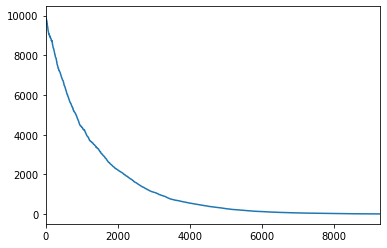

In [0]:
%matplotlib inline
performance.net_worth.plot()

## Saving and Restoring

All trading strategies are capable of saving their agent to a file, for later restoring. The environment is not saved, as it does not have state that we care about preserving. To save our `TensorflowTradingStrategy` to a file, we just need to provide the path of the file to our strategy.

In [0]:
print(os.getcwd())
%ls

/content/tensortrade
CODE_OF_CONDUCT.md  examples/    README.md         tensortrade/
CONTRIBUTING.md     LICENSE      requirements.txt  tensortrade.egg-info/
Dockerfile          Makefile     setup.cfg         tests/
docs/               MANIFEST.in  setup.py


In [0]:
strategy.save_agent(path="ppo_btc_1h")

_This specific strategy saves multiple files, including a directory of models to the path provided._

To restore the agent from the file, we first need to instantiate our strategy, before calling restore_agent.

In [0]:
new_strategy = StableBaselinesTradingStrategy(environment=environment,
                                          model=model,
                                          policy=policy,
                                          model_kwargs=params)

new_strategy.restore_agent(path="ppo_btc_1h")

Our strategy is now restored back to its previous state, and ready to be used again. Let's see how it does.

## Tuning Your Strategy

Sometimes a trading strategy will require tuning a set of hyper-parameters, or features, on an environment to achieve maximum performance. In this case, each `TradingStrategy` provides an optionally implementable tune method.

Tuning a model is similar to training a model, however in addition to adjusting and saving the weights and biases of the best performing model, the strategy also adjusts and persists the hyper-parameters that produced that model. 

In [0]:
from tensortrade.environments import TradingEnvironment
from tensortrade.exchanges.simulated import FBMExchange

exchange = FBMExchange(timeframe='1h', base_instrument='BTC', feature_pipeline=feature_pipeline)
environment = TradingEnvironment(exchange=exchange, 
                                 action_strategy=action_strategy, 
                                 reward_strategy=reward_strategy) 
new_strategy.environment = environment 
tuned_performance = new_strategy.tune(episodes=10)

NotImplementedError: ignored

In this case, the agent will be trained for 10 episodes, with a different set of hyper-parameters each episode. The best set will be saved within the strategy, and used any time strategy.run() is called thereafter.

## Strategy Evaluation

Now that we've tuned and trained our agent, it's time to see how well it performs. To evaluate our strategy's performance on unseen data, we will need to run it on a new environment backed by such data.

In [0]:
import pandas as pd
from tensortrade.environments import TradingEnvironment
from tensortrade.exchanges.simulated import SimulatedExchange

df = pd.read_csv('/content/tensortrade/examples/data/Coinbase_BTCUSD_d.csv', skiprows=1)
exchange = SimulatedExchange(data_frame=df,
                             feature_pipeline=feature_pipeline,
                             base_instrument='USD',
                             should_pretransform_obs=True)

environment = TradingEnvironment(exchange=exchange,
                                 action_strategy=action_strategy,
                                 reward_strategy=reward_strategy)

new_strategy.environment = environment

test_performance = new_strategy.run(steps=2000)

Finished running strategy.
Total episodes: 1 (2000 timesteps).
Average reward: -0.6791065948644133.


In [0]:
df.tail()

,date,symbol,open,high,low,close,volume_btc,volume
1765,2014-12-05,BTCUSD,377.1,377.1,377.10,377.1,0.00000,0.00
1766,2014-12-04,BTCUSD,378.0,378.0,377.10,377.1,0.01000,3.77
1767,2014-12-03,BTCUSD,378.0,378.0,377.01,378.0,0.54660,206.52
1768,2014-12-02,BTCUSD,370.0,378.0,370.00,378.0,15.01000,5675.07
1769,2014-12-01,BTCUSD,300.0,370.0,300.00,370.0,0.05656,19.53


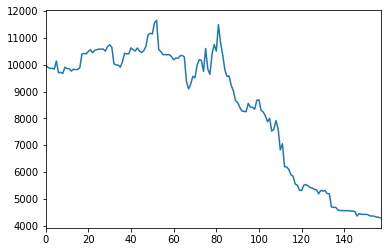

In [0]:
%matplotlib inline

test_performance.net_worth.plot()

When complete, strategy.run returns a `Pandas.data_frame` of the agent's performance, including the net worth and balance of the agent at each time step.

## Live Trading

Once you've built a profitable trading strategy, trained an agent to trade it properly, and ensured its "generalize-ability" to new data sets, all there is left to do is profit. Using a live exchange such as `CCXTExchange`, you can plug your strategy in and let it run!

While the gambler in you may enjoy starting a strategy and letting it run without bounds, the more risk averse of you can use a `trade_callback`, which will be called each time the strategy makes a trade. This callback function, similar to the episode callback, will pass in a data frame containing the agent's overall performance, and expects a `bool` in return. If `True`, the agent will continue trading, otherwise, the agent will stop and return its performance over the session.

In [0]:
import ccxt
from tensortrade.environments import TradingEnvironment
from tensortrade.exchanges.live import CCXTExchange

binance = ccxt.binance({
    'apiKey': 'HfPX38sJ2aKewYDUJx6TaWrDhuT7rq426elO5Gbc55Dvg4klASEfm0aqcdl4Mpz6',
    'secret': 'aGdMMaaol3GkyzDcrSEoc4aFlWG78qCxnGl3o22ub24u2scrZRcsIe2qn0kI82GQ',
    'enableRateLimit': True,
})

exchange = CCXTExchange(exchange=binance,
                        base_instrument='BNB',
                        observation_type='ohlcv',
                        timeframe='1h')

btcusd_actions = DiscreteActionStrategy(n_actions=20, instrument_symbol='BNB/BTC')

environment = TradingEnvironment(exchange=exchange,
                                 feature_pipeline=feature_pipeline,
                                 action_strategy=btcusd_actions,
                                 reward_strategy=reward_strategy)

strategy.environment = environment

live_performance = strategy.run(steps=1)

InvalidOrder: ignored

In [0]:
live_performance

{}

_Passing `steps=0` instructs the strategy to run until otherwise stopped._

https://colab.research.google.com/drive/1r9I-DJjrT-0JHbrB10NLFudZ7hQdOcdq